# **Statistical Inference - TITLE**

Group Members: Andy Hu, Wendi Ke, CC Liang, Mridul Manas

## Introduction
The term ‘crime’ brings chills down everyone’s spines, as it involves unlawful activities, ranging from petty theft to serious acts of violence that result in lifetime sentences in jail. Understanding the distribution of different crimes at different locations can be an excellent way to minimize the risk of encountering unlawful activities, and save oneself from falling victim to any such occurrences. One common crime here surrounding the UBC Vancouver campus is bicycle theft, where it is fairly easy to find a missing bicycle tire or seat, which is a concern for the many UBc students who cycle around campus. In this paper, we will delve deeper into the nature of such crimes occurring near the UBC Vancouver campus. In particular, we will look into the Dunbar-Southlands and West Point Grey neighborhoods as they are the two of the closest neighbourhoods to campus.



### Research Question
Is there a statistically significant difference between the proportion of bicycle theft occurring in Dunbar-Southlands and West Point Grey? 

### Variables
The random variable that we are interested in comparing in this study is the proportion of bicycle theft in the neighborhoods of Dunbar-Southlands and West Point Grey. Of the response variable, we can use mean as the location parameter and standard deviation as the scale parameter. <b><font color=red>ADD REASONINGS TO WHY THESE RESPONSE VARIABLES — NORMAL DISTRIBUTION OR NOT</b></font>

### Hypotheses
- Null Hypothesis $H_0$: There is no difference between the proportion of bicycle theft in the neighborhoods of Dunbar-Southlands and West Point Grey; $H_0: \mu_1 - \mu_2 = d_0$
- Alternative Hypothesis $H_A$: There are differences between the proportion of bicycle theft in the neighborhoods of Dunbar-Southlands and West Point Grey; $H_0: \mu_1 - \mu_2 \neq d_0$

### Dataset Description
To conduct our research, we will be using the [Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/), which includes information on the different types of crimes occurring at specific geographical locations from 2003 to 2023. We will be primarily focusing on crimes within the last 5 years, 2018 to 2022, for the neighborhoods of Dunbar-Southlands and West Point Grey in order to base our research upon more recent and prevalent information about contemporary crime in Vancouver near UBC.

## Preliminary Results


### Loading Packages and Seed Setting
The `tideverse` and `infer` packages allow us to clean and wrangle data, create visualizations, and make statistical inferences. We set the seed to be 1 and will keep it for the entire data analysis. We also set the options to ensure that graphs will display properly.

In [5]:
library(tidyverse)
library(infer)
options(repr.plot.width = 15, repr.plot.height = 8)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Reading the Dataset
The file is a .csv file with headers so we can use `read_csv`. We uploaded the dataset to our remote GitHub repository so we can read it directly from web.

In [ ]:
crime <- read.csv("https://raw.githubusercontent.com/fankayii/STAT201_34/main/crime.csv")
head(crime)

### Cleaning and Wrangling Data
The goal of this step is to remove unnecessary columns and NA rows. 

In [46]:
crime_recent_5_years <- crime %>%
    filter(YEAR>=2018 & YEAR<=2022)%>%
    filter(NEIGHBOURHOOD %in% c("West Point Grey","Dunbar-Southlands"))%>%
    select(TYPE,NEIGHBOURHOOD)
head(crime_recent_5_years)

,TYPE,NEIGHBOURHOOD
,<chr>,<chr>
1,Theft from Vehicle,West Point Grey
2,Theft from Vehicle,West Point Grey
3,Theft from Vehicle,West Point Grey
4,Theft from Vehicle,West Point Grey
5,Theft from Vehicle,West Point Grey
6,Theft from Vehicle,West Point Grey


In [ ]:
bicycle_theft <- crime_recent_5_years %>%
    filter(TYPE=="Theft of Bicycle")%>%
    select(NEIGHBOURHOOD)
head(bicycle_theft)

In [ ]:
total_crime <- crime_recent_5_years%>%
    group_by(NEIGHBOURHOOD)%>%
    summarise(count=n())
total_crime


### Computing Estimates of the Parameter
- present this in a table. if relevant, include these estimates in your plot.

In [52]:
summary <- bicycle_theft %>%
    group_by(NEIGHBOURHOOD)%>%
    summarise(count=n())%>%
    mutate(total_crime=total_crime$count)%>%
    mutate(prop=count/total_crime)
    
summary

NEIGHBOURHOOD,count,total_crime,prop
<chr>,<int>,<int>,<dbl>
Dunbar-Southlands,100,2165,0.04618938
West Point Grey,121,1933,0.06259700


### Visualizing Raw Data

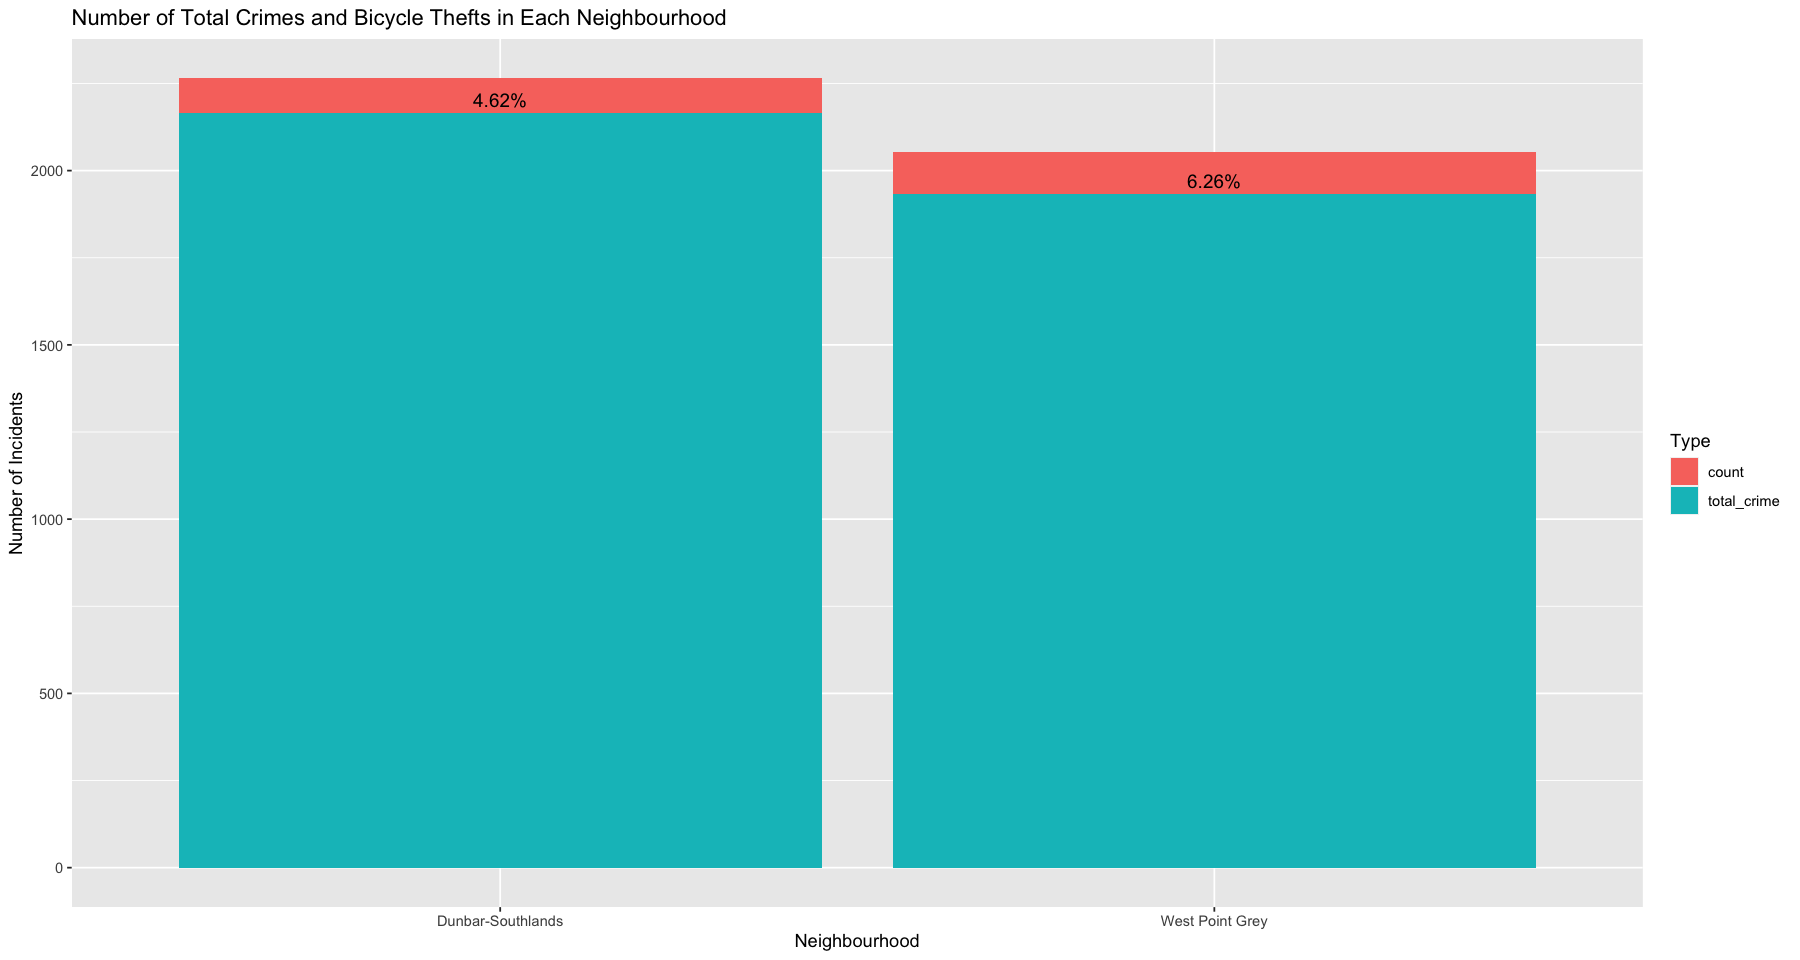

In [73]:
long_data <- summary %>%
  pivot_longer(cols = c(count, total_crime),
               names_to = "Type",
               values_to = "Number")
plot <-long_data %>%
  ggplot( aes(x = NEIGHBOURHOOD, y = Number, fill = Type)) +
  geom_bar(stat="identity") +
  geom_text(data = long_data %>% filter(Type == "total_crime"), 
            aes(label = paste0(round(summary$prop*100, 2), "%")), 
            vjust = -0.5, size = 4, color = "black") +
  labs(x = "Neighbourhood", y = "Number of Incidents", 
       title = "Number of Total Crimes and Bicycle Thefts in Each Neighbourhood")
plot

## Methods: Plan
We will carry a two-sample t-test for this study as we are comparing the two neighborhoods. After taking a relatively large sample from the population, we will create bootstrap samples and apply asymptotics, which we then can calculate the p-value needed to decide whether we could reject our null hypothesis or not.

We expect that West Point Grey will have a higher proportion of bike theft compared to Dunbar Southlands, because it is closer to the UBC campus, meaning that there may be more bicycles here with the abundance of students who own bicycles and cycle to class everyday. 

Our findings could impact residents living in West Point Grey and Dunbar Southlands to be more wary of bicycle theft in their area. In fact, it can help individuals decide on which neighbourhood they would rather live in, should they want to be careful about bicycle theft near their living area. 

Should we find a statistical significance between the proportion of bicycle theft in both areas, it may raise further questions in determining the underlying motivations behind such thefts and what features cause an increase in bicycle theft in one area compared to another.


## References
- <b><font color=red>ADD 2 publication</font></b>